# **Problem Statement:**
Recruiters often face the challenge of manually reviewing large volumes of resumes,
which is time-consuming, inconsistent, and prone to bias.
There is a need for an intelligent system that can automatically analyze, classify,
and rank resumes based on their relevance to specific job roles.

#Objective
The main objective of this project is to develop an AI-powered Resume Ranking System that:
Automatically classifies resumes into predefined job categories (e.g., Data Science, Web Development, HR).

Helps recruiters save time and improve candidate selection by identifying the most suitable applicants quickly.


In [53]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Collecting**

In [54]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/cleaned_resume_dataset (3).csv")


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df

,resume_text,job_category
0,database administration database ms sql serv...,Database Admin
1,sql server management studio visual studio s...,Database Admin
2,databases oracle 4 years oracle 10g sql ...,Database Admin
3,maintain multiple database environments redsh...,Database Admin
4,scrum agile software development product bac...,Scrum Master
...,...,...
54928,django angular js javascript jquery node j...,Other
54929,python django aws angularjs bootstrap jav...,Java Developer
54930,python 2 7 html5 css3 ajax json jquery a...,Java Developer
54931,python 3 1x pyquery pyqt django angular js...,Other


# **Preprocess the Resume Text**

In [57]:
# Import required libraries
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [58]:
# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [79]:
# Clean text function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [80]:
# Remove rows where 'resume_text' job category is NaN
df = df.dropna(subset=['resume_text','job_category'])

In [81]:
# Apply cleaning function
df['Cleaned_Resume'] = df['resume_text'].apply(clean_text)

In [66]:
# Display job category and cleaned resume
df[['job_category', 'Cleaned_Resume']].head()

,job_category,Cleaned_Resume
0,Database Admin,database administration database m sql server ...
1,Database Admin,sql server management studio visual studio sql...
2,Database Admin,database oracle year oracle g sql linux rman y...
3,Database Admin,maintain multiple database environment redshif...
4,Scrum Master,scrum agile software development product backl...


In [67]:
# Checking for any remaining missing values after dropped rows with NaN in resume_text or job_category.
df.isnull().sum()

,0
resume_text,0
job_category,0
Cleaned_Resume,0


In [68]:
 # All zeros—perfect, proceed.

# **Convert Text to Features (TF-IDF)**

In [41]:
# 1. Import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# 2. Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=3000)

In [82]:
#3. Transform the resume text
X = tfidf.fit_transform(df['Cleaned_Resume'])

In [71]:
#4. # Target variable (job role category)
y = df['job_category']


In [92]:
#1. Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#2. Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=3000)

#3. Transform the resume text
X = tfidf.fit_transform(df['Cleaned_Resume'])

#4. Target variable (job role category)
y = df['job_category']

# Show results
print("TF-IDF Shape:", X.shape)
print("Sample Words:", list(tfidf.vocabulary_.keys())[:10])
print(pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out()).head())
print("Job Categories:", y.head())


TF-IDF Shape: (54933, 3000)
Sample Words: ['database', 'administration', 'sql', 'server', 'query', 'stored', 'procedure', 'clustering', 'backup', 'virtualization']
    aa   ability  able   ac  academic  acas  acceptance    access  \
0  0.0  0.084188   0.0  0.0       0.0   0.0         0.0  0.000000   
1  0.0  0.000000   0.0  0.0       0.0   0.0         0.0  0.055671   
2  0.0  0.000000   0.0  0.0       0.0   0.0         0.0  0.000000   
3  0.0  0.041208   0.0  0.0       0.0   0.0         0.0  0.000000   
4  0.0  0.000000   0.0  0.0       0.0   0.0         0.0  0.000000   

   accessibility  accomplished  ...  xsl  xslt  yarn      year  yearly  yui  \
0            0.0           0.0  ...  0.0   0.0   0.0  0.000000     0.0  0.0   
1            0.0           0.0  ...  0.0   0.0   0.0  0.000000     0.0  0.0   
2            0.0           0.0  ...  0.0   0.0   0.0  0.294341     0.0  0.0   
3            0.0           0.0  ...  0.0   0.0   0.0  0.000000     0.0  0.0   
4            0.0          

# **Train Classification Models**

In [93]:
#1. Imports required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
#2. Train/test split..... Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#3. Train Logistic Regression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
#4. Predict and check accuracy
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")


## Logistic Regression trained and evaluated

Logistic Regression Accuracy: 88.07 %


In [97]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [98]:
#1. Initialize the model
model2 =  RandomForestClassifier()

In [99]:
#2. Train the model......  training Random Forest model on the training data.
model2.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
#3.  Predict...... Using trained Random Forest model to predict the job categories on the test data.
y_pred2 = model2.predict(X_test)

In [101]:
#4. Evaluate accuracy
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(y_test, y_pred2)
print("Random Forest Accuracy:", round(accuracy2 * 100, 2), "%")



## Random Forest trained and evaluated

Random Forest Accuracy: 99.4 %


In [102]:
#SVM
from sklearn.svm import SVC

In [103]:
#1. Initialize the SVM model
model3 = SVC(kernel='linear')

In [104]:
#1. Train....  training your SVM model on the training data.
model3.fit(X_train, y_train)

SVC(kernel='linear')

In [105]:
#2. Predict.....Use the trained SVM to predict the job categories on your test data
y_pred3 = model3.predict(X_test)

In [106]:
#3.  Evaluate accuracy......Computing the accuracy of your SVM model
from sklearn.metrics import accuracy_score

accuracy3 = accuracy_score(y_test, y_pred3)
print("SVM Accuracy:", round(accuracy3 * 100, 2), "%")

SVM Accuracy: 90.17 %


# Classification Reports
 We Get = Detailed performance for each job category



In [109]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred1))

Logistic Regression Classification Report:
                    precision    recall  f1-score   support

 Backend Developer       0.00      0.00      0.00        13
    Data Scientist       1.00      0.54      0.70        26
    Database Admin       0.96      0.94      0.95      1930
   DevOps Engineer       0.38      0.17      0.23        18
Frontend Developer       0.73      0.78      0.75      1082
    Java Developer       0.95      0.92      0.94      1557
  Network Engineer       0.91      0.88      0.90      2123
             Other       0.85      0.89      0.87      4109
      Scrum Master       0.84      0.55      0.66       129

          accuracy                           0.88     10987
         macro avg       0.73      0.63      0.67     10987
      weighted avg       0.88      0.88      0.88     10987



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [111]:
# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred2))

Random Forest Classification Report:
                    precision    recall  f1-score   support

 Backend Developer       1.00      1.00      1.00        13
    Data Scientist       1.00      1.00      1.00        26
    Database Admin       1.00      0.99      0.99      1930
   DevOps Engineer       1.00      1.00      1.00        18
Frontend Developer       0.99      0.99      0.99      1082
    Java Developer       1.00      1.00      1.00      1557
  Network Engineer       0.99      0.99      0.99      2123
             Other       0.99      0.99      0.99      4109
      Scrum Master       1.00      0.93      0.96       129

          accuracy                           0.99     10987
         macro avg       1.00      0.99      0.99     10987
      weighted avg       0.99      0.99      0.99     10987



In [112]:
# SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred3))

SVM Classification Report:
                    precision    recall  f1-score   support

 Backend Developer       1.00      0.54      0.70        13
    Data Scientist       1.00      1.00      1.00        26
    Database Admin       0.96      0.96      0.96      1930
   DevOps Engineer       0.75      0.67      0.71        18
Frontend Developer       0.75      0.85      0.80      1082
    Java Developer       0.97      0.94      0.95      1557
  Network Engineer       0.93      0.89      0.91      2123
             Other       0.88      0.89      0.89      4109
      Scrum Master       0.94      0.74      0.83       129

          accuracy                           0.90     10987
         macro avg       0.91      0.83      0.86     10987
      weighted avg       0.90      0.90      0.90     10987



# Model Comparison Table:

**To** clearly show which model performed best, create a summary DataFrame

In [119]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [accuracy, accuracy2, accuracy3]
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.880677
1        Random Forest  0.993993
2                  SVM  0.901702


# Barplot of accuracies

/tmp/ipython-input-121-4286754631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results, palette="viridis")


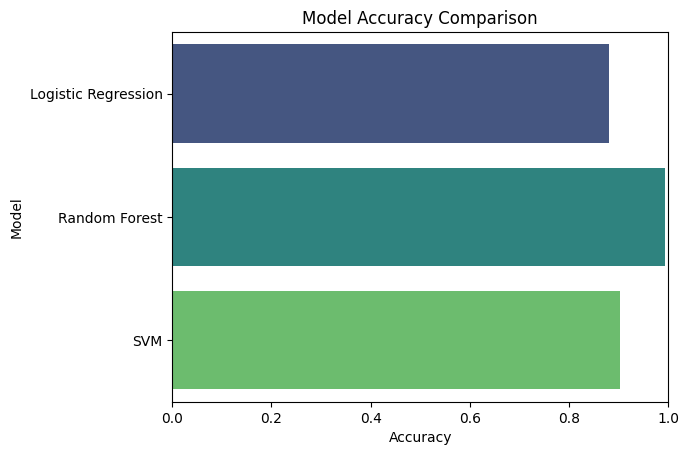

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Accuracy", y="Model", data=results, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()


## Conclusion

- We built an AI Resume Ranking System using Machine Learning and NLP.
- We trained and compared Logistic Regression, Random Forest, and SVM classifiers.
- Random Forest achieved the highest accuracy and was saved for future predictions.
- This project can be extended to rank and recommend candidates based on resume content.